In [2]:
from sklearn.model_selection import KFold
import pandas as pd
from os import chdir
import csv
import math
import numpy as np
import time
from operator import itemgetter
import sys
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif, chi2
from sklearn import metrics
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import KBinsDiscretizer, scale

In [3]:
chdir('C:/Users/Shuya C/Desktop/depaul/dsc540')

In [4]:
data=pd.read_csv('attritioncleaneddata.csv',sep=',')
target = data['Attrition']
features=data.drop(columns=['Attrition','EmployeeNumber'])

In [5]:
#splite original dataset
data_train, data_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [6]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

Using TensorFlow backend.


In [8]:
oversampler=SMOTE(random_state=1) #Over-sample using SMOTE
smote_train, smote_target = oversampler.fit_sample(data_train,target_train)
print(len(target_train), len(smote_target))
print('target_train:',Counter(target_train))
print('smote_target:',Counter(smote_target))
from imblearn.over_sampling import SVMSMOTE #Over-sample using SVMSMOTE
sm = SVMSMOTE(random_state=1)
svmsmote_train,svmsmote_target = sm.fit_resample(data_train,target_train)
print(len(target_train),len(svmsmote_target))
print('svmsmote_target:',Counter(svmsmote_target))

1176 1994
target_train: Counter({0: 997, 1: 179})
smote_target: Counter({0: 997, 1: 997})
1176 1994
svmsmote_target: Counter({0: 997, 1: 997})


Decision Tree Acc: 0.7721088435374149
Decision Tree AUC: 0.6095850379894798
Runtime: 0.03789949417114258
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       236
           1       0.41      0.34      0.37        58

    accuracy                           0.77       294
   macro avg       0.63      0.61      0.62       294
weighted avg       0.76      0.77      0.76       294



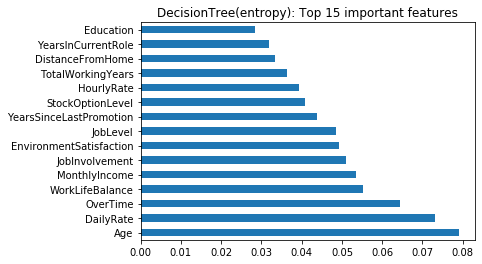

In [9]:
start_ts=time.time()
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=1)
clf.fit(data_train, target_train)
scores_ACC = clf.score(data_test, target_test)
print('Decision Tree Acc:', scores_ACC)
scores_AUC = metrics.roc_auc_score(target_test, clf.predict_proba(data_test)[:,1])
print('Decision Tree AUC:', scores_AUC)
print("Runtime:", time.time()-start_ts)
print(metrics.classification_report(target_test, clf.predict(data_test)))
d=list(zip(clf.feature_importances_, features.columns))
rd=sorted(d,reverse = True)
df1feat_importances = pd.Series(clf.feature_importances_, index=features.columns)
df1feat_importances.nlargest(15).plot(kind='barh')
plt.title('DecisionTree(entropy): Top 15 important features')
plt.show()

Decision Tree Acc: 0.8027210884353742
Decision Tree AUC: 0.6861484511981297
Runtime: 0.024933576583862305
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       236
           1       0.50      0.43      0.46        58

    accuracy                           0.80       294
   macro avg       0.68      0.66      0.67       294
weighted avg       0.79      0.80      0.80       294



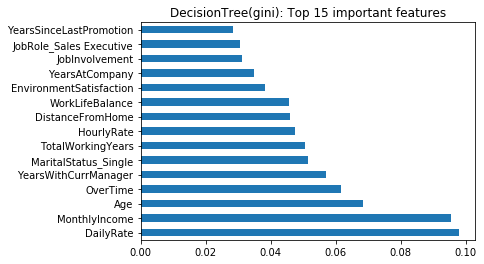

In [10]:
# DecisionTreeClassifier(criterion='gini') on original train dataset
start_ts2=time.time()
clf_g = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=1)
clf_g.fit(data_train, target_train)
scores_ACC_g = clf_g.score(data_test, target_test)
print('Decision Tree Acc:', scores_ACC_g)
scores_AUC_g = metrics.roc_auc_score(target_test, clf_g.predict_proba(data_test)[:,1])
print('Decision Tree AUC:', scores_AUC_g)
print("Runtime:", time.time()-start_ts2)
print(metrics.classification_report(target_test, clf_g.predict(data_test)))
e=list(zip(clf_g.feature_importances_, features.columns))
rke=sorted(e,reverse = True)
df2feat_importances = pd.Series(clf_g.feature_importances_, index=features.columns)
df2feat_importances.nlargest(15).plot(kind='barh')
plt.title('DecisionTree(gini): Top 15 important features')
plt.show()

Random Forest Acc: 0.8231292517006803
Random Forest AUC: 0.8055961426066627
Runtime: 0.5021700859069824
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       236
           1       0.75      0.16      0.26        58

    accuracy                           0.82       294
   macro avg       0.79      0.57      0.58       294
weighted avg       0.81      0.82      0.77       294



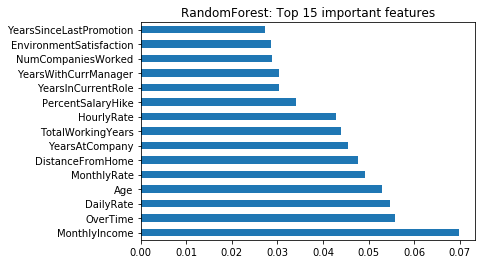

In [11]:
# RandomForestClassifier on original train dataset
start_ts4=time.time()
rclf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=3, random_state=1)  
rclf.fit(data_train,target_train)
rscores_ACC = rclf.score(data_test, target_test)                                                                                                                          
print('Random Forest Acc:', rscores_ACC)
rscores_AUC = metrics.roc_auc_score(target_test, rclf.predict_proba(data_test)[:,1])         
print('Random Forest AUC:', rscores_AUC)   
print("Runtime:", time.time()-start_ts4)
print(metrics.classification_report(target_test, rclf.predict(data_test)))
c=list(zip(rclf.feature_importances_, features.columns))
rk=sorted(c,reverse = True)
rffeat_importances = pd.Series(rclf.feature_importances_, index=features.columns)
rffeat_importances.nlargest(15).plot(kind='barh')
plt.title('RandomForest: Top 15 important features')
plt.show()

GradientBoosting Acc: 0.8231292517006803
GradientBoosting AUC: 0.8056691992986558
Runtime: 21.174740076065063
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       236
           1       0.62      0.28      0.38        58

    accuracy                           0.82       294
   macro avg       0.73      0.62      0.64       294
weighted avg       0.80      0.82      0.80       294



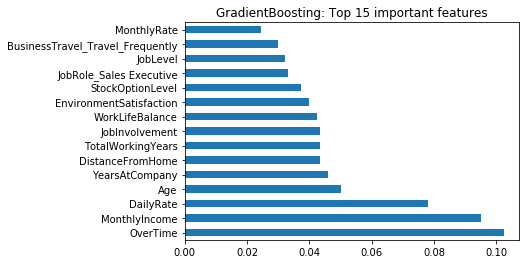

In [12]:
#GradientBoostingClassifier 
start_ts=time.time()
gbtclf=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, min_samples_split=3, max_depth=3, random_state=1)
gbtclf.fit(data_train,target_train)
gbtscores_ACC = gbtclf.score(data_test, target_test)                                                                                                                          
print('GradientBoosting Acc:', gbtscores_ACC)
gbtscores_AUC = metrics.roc_auc_score(target_test, gbtclf.predict_proba(data_test)[:,1])         
print('GradientBoosting AUC:', gbtscores_AUC)   
print("Runtime:", time.time()-start_ts4)
print(metrics.classification_report(target_test, gbtclf.predict(data_test)))
gb=list(zip(gbtclf.feature_importances_, features.columns))
r=sorted(gb,reverse = True)
gbfeat_importances = pd.Series(gbtclf.feature_importances_, index=features.columns)
gbfeat_importances.nlargest(15).plot(kind='barh')
plt.title('GradientBoosting: Top 15 important features')
plt.show()

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


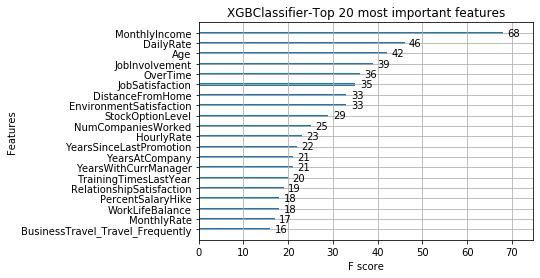

In [13]:
!pip install xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance
model = XGBClassifier()
model.fit(features, target)
# plot feature importance
plot_importance(model, max_num_features=20)# top 20 most important features
plt.title('XGBClassifier-Top 20 most important features')
plt.show()

In [14]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
scorers2 = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
           'roc_auc': 'roc_auc'}

In [15]:
# DecisionTreeClassifier, cv= 10
start_ts=time.time()
dtclf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=1)
scores=cross_validate(dtclf, features, target, scoring= scorers2, cv=10)
scores_Acc = scores['test_accuracy']     
print("DecisionTree Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
scores_AUC= scores['test_roc_auc']                                                                   
print("DecisionTree AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))  
scores_precision= scores['test_precision']  
print("DecisionTree precision: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std() * 2)) 
scores_recall= scores['test_recall']  
print("DecisionTree recall: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std() * 2)) 
scores_f1= scores['test_f1_score']  
print("DecisionTree F1 score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2)) 
print("CV Runtime:", time.time()-start_ts)

DecisionTree Acc: 0.80 (+/- 0.04)
DecisionTree AUC: 0.64 (+/- 0.06)
DecisionTree precision: 0.38 (+/- 0.10)
DecisionTree recall: 0.40 (+/- 0.11)
DecisionTree F1 score: 0.39 (+/- 0.10)
CV Runtime: 0.38703465461730957


In [16]:
# RandomForestClassifier , CV=10
start_ts=time.time()
rfclf=RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=3, random_state=1)
scores=cross_validate(rfclf, features, target, scoring= scorers2, cv=10)
scores_Acc3 = scores['test_accuracy']     
print("RandomForest Acc: %0.2f (+/- %0.2f)" % (scores_Acc3.mean(), scores_Acc3.std() * 2))                                                                                                    
scores_AUC3= scores['test_roc_auc']                                                                   
print("RandomForest AUC: %0.2f (+/- %0.2f)" % (scores_AUC3.mean(), scores_AUC3.std() * 2))  
scores_precision3= scores['test_precision']  
print("RandomForest precision: %0.2f (+/- %0.2f)" % (scores_precision3.mean(), scores_precision3.std() * 2)) 
scores_recall3= scores['test_recall']  
print("RandomForest recall: %0.2f (+/- %0.2f)" % (scores_recall3.mean(), scores_recall3.std() * 2)) 
scores_f13= scores['test_f1_score']  
print("RandomForest F1 score: %0.2f (+/- %0.2f)" % (scores_f13.mean(), scores_f13.std() * 2)) 
print("CV Runtime:", time.time()-start_ts)

RandomForest Acc: 0.86 (+/- 0.02)
RandomForest AUC: 0.80 (+/- 0.10)
RandomForest precision: 0.84 (+/- 0.29)
RandomForest recall: 0.18 (+/- 0.11)
RandomForest F1 score: 0.29 (+/- 0.15)
CV Runtime: 4.610104084014893


In [17]:
#GradientBoostingClassifier CV=10
start_ts=time.time()
gbclf=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, min_samples_split=3, max_depth=3, random_state=1)
scores=cross_validate(gbclf, features, target, scoring= scorers2, cv=10)
#print(scores)
scores_Acc4 = scores['test_accuracy']     
print("Gradient Boosting Acc: %0.2f (+/- %0.2f)" % (scores_Acc4.mean(), scores_Acc4.std() * 2))                                                                                                    
scores_AUC4= scores['test_roc_auc']                                                                   
print("Gradient Boosting AUC: %0.2f (+/- %0.2f)" % (scores_AUC4.mean(), scores_AUC4.std() * 2))  
scores_precision4= scores['test_precision']  
print("Gradient Boosting precision: %0.2f (+/- %0.2f)" % (scores_precision4.mean(), scores_precision4.std() * 2)) 
scores_recall4= scores['test_recall']  
print("Gradient Boosting recall: %0.2f (+/- %0.2f)" % (scores_recall4.mean(), scores_recall4.std() * 2)) 
scores_f14= scores['test_f1_score']  
print("Gradient Boosting F1 score: %0.2f (+/- %0.2f)" % (scores_f14.mean(), scores_f14.std() * 2)) 
print("CV Runtime:", time.time()-start_ts)

Gradient Boosting Acc: 0.87 (+/- 0.04)
Gradient Boosting AUC: 0.81 (+/- 0.10)
Gradient Boosting precision: 0.74 (+/- 0.25)
Gradient Boosting recall: 0.31 (+/- 0.28)
Gradient Boosting F1 score: 0.42 (+/- 0.29)
CV Runtime: 7.991952180862427


Decision Tree Acc: 0.7108843537414966
Decision Tree AUC: 0.5628652834599648
Runtime: 0.03889656066894531
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       236
           1       0.28      0.29      0.29        58

    accuracy                           0.71       294
   macro avg       0.55      0.55      0.55       294
weighted avg       0.72      0.71      0.71       294



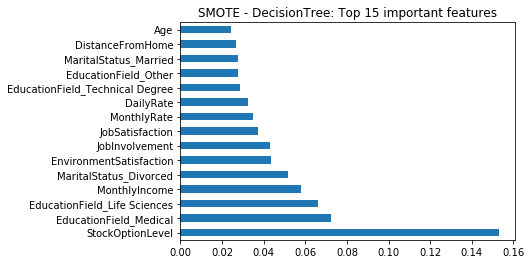

In [18]:
# DecisionTreeClassifier use smote data
start_ts5=time.time()
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=1)
clf.fit(smote_train, smote_target)
scores_ACC = clf.score(data_test, target_test)
print('Decision Tree Acc:', scores_ACC)
scores_AUC = metrics.roc_auc_score(target_test, clf.predict_proba(data_test)[:,1])
print('Decision Tree AUC:', scores_AUC)
print("Runtime:", time.time()-start_ts5)
print(metrics.classification_report(target_test, clf.predict(data_test)))
b=list(zip(clf.feature_importances_, features.columns))
sorted(b,reverse = True)

dffeat_importances = pd.Series(clf.feature_importances_, index=features.columns)
dffeat_importances.nlargest(15).plot(kind='barh')
plt.title('SMOTE - DecisionTree: Top 15 important features')
plt.show()

Random Forest Acc: 0.8401360544217688
Random Forest AUC: 0.7604471069549971
Runtime: 0.6287715435028076
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       236
           1       0.72      0.31      0.43        58

    accuracy                           0.84       294
   macro avg       0.79      0.64      0.67       294
weighted avg       0.83      0.84      0.81       294



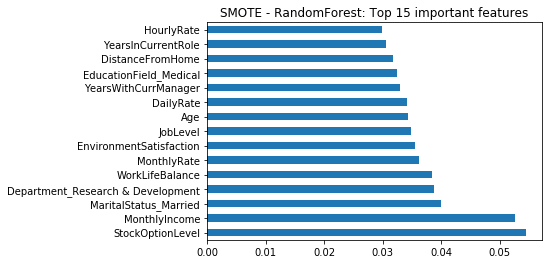

In [19]:
# RandomForestClassifier use smote data
start_ts=time.time()
rclf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=3, random_state=1)  
rclf.fit(smote_train, smote_target)
scores_ACC = rclf.score(data_test, target_test)                                                                                                                          
print('Random Forest Acc:', scores_ACC)
scores_AUC = metrics.roc_auc_score(target_test, rclf.predict_proba(data_test)[:,1])         
print('Random Forest AUC:', scores_AUC)   
print("Runtime:", time.time()-start_ts)
print(metrics.classification_report(target_test, rclf.predict(data_test)))
a=list(zip(rclf.feature_importances_, features.columns))
sorted(a,reverse = True)
feat_importances = pd.Series(rclf.feature_importances_, index=features.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('SMOTE - RandomForest: Top 15 important features')
plt.show()

In [57]:
#undersampling
rus = under_sampling.RandomUnderSampler(random_state=1)
under_train, under_target = rus.fit_resample(data_train,target_train)
print('undersample_target:',Counter(under_target))
#SMOTEENN
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=1)
senn_train,senn_target = sme.fit_resample(data_train,target_train)
print('SMOTEENN_target:',Counter(senn_target))

undersample_target: Counter({0: 179, 1: 179})
SMOTEENN_target: Counter({1: 666, 0: 511})


Wrapper Select: 
Gradient boosting feature selection on Undersampling data
 Selected= ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'MonthlyIncome', 'MonthlyRate', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Department_Sales', 'JobRole_Sales Representative']
Features (total/selected): 50 19
GB Acc: 0.6938775510204082
GB AUC: 0.7251607247223846
Runtime: 0.21544623374938965
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       236
           1       0.35      0.64      0.45        58

    accuracy                           0.69       294
   macro avg       0.62      0.67      0.62       294
weighted avg       0.78      0.69      0.72       294



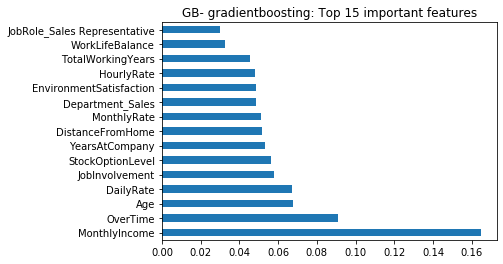

In [80]:
#feature selection using gradientboosting classifier +UNDERSAMPLING
from sklearn.ensemble import GradientBoostingClassifier
clf =GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, min_samples_split=3, max_depth=3, random_state=1) 
sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                                                         
print ('Wrapper Select: ')     
fit_mod=sel.fit(under_train, under_target )    
sel_idx=fit_mod.get_support()
sel_index=sel_idx.tolist()
#print(sel_index)
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(under_train.columns.values)):
    if sel_index[i]==True:    
        temp.append(under_train.columns.values[i])
        temp_idx.append(i)
    else:                                                                       
        temp_del.append(i)
print('Gradient boosting feature selection on Undersampling data')
print(' Selected=', temp)
print('Features (total/selected):', len(under_train.columns), len(temp))
#splite gradientboosting selected features 
g_feature=under_train[temp]
#GB using GB selected features FROM UNDERSAMPLING DATA
start_ts=time.time()
gbclf4=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, min_samples_split=3, max_depth=3, random_state=1)
gbclf4.fit(g_feature, under_target)   
scores_ACC1ag = gbclf4.score(data_test[temp], target_test)                                                                                                                                                                                                                                               
print('GB Acc:', scores_ACC1ag)
scores_AUC1ag = metrics.roc_auc_score(target_test, gbclf4.predict_proba(data_test[temp])[:,1])         
print('GB AUC:', scores_AUC1ag)   
print("Runtime:", time.time()-start_ts)
print(metrics.classification_report(target_test, gbclf4.predict(data_test[temp])))
gbgb2feat_importances = pd.Series(gbclf4.feature_importances_, index=g_feature.columns)
gbgb2feat_importances.nlargest(15).plot(kind='barh')
plt.title('GB- gradientboosting: Top 15 important features')
plt.show()


In [103]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from IPython.display import Image
from graphviz import *
from graphviz import Source
import pydotplus
import graphviz 
from sklearn import tree
import io
gbclf4=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, min_samples_split=3, max_depth=3, random_state=1)
gbclf4.fit(g_feature, under_target)   
estimator = gbclf4.estimators_[10, 0]

from sklearn.tree import export_graphviz
# Export as dot file
dot_data2= export_graphviz(estimator,  feature_names=g_feature.columns)

from graphviz import Source

graph = graphviz.Source(dot_data2) 
graph.render("tree5.png",view = True)


'tree5.png.pdf'

XGBClassifier Acc: 0.6904761904761905
XGBClassifier AUC: 0.7274985388661602
Runtime: 0.06981635093688965
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       236
           1       0.35      0.64      0.45        58

    accuracy                           0.69       294
   macro avg       0.62      0.67      0.62       294
weighted avg       0.78      0.69      0.72       294



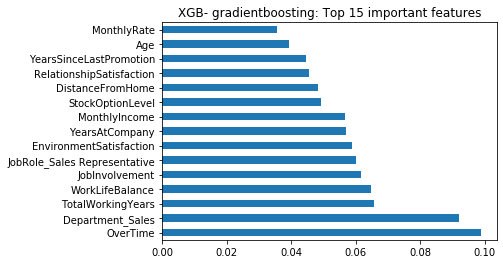

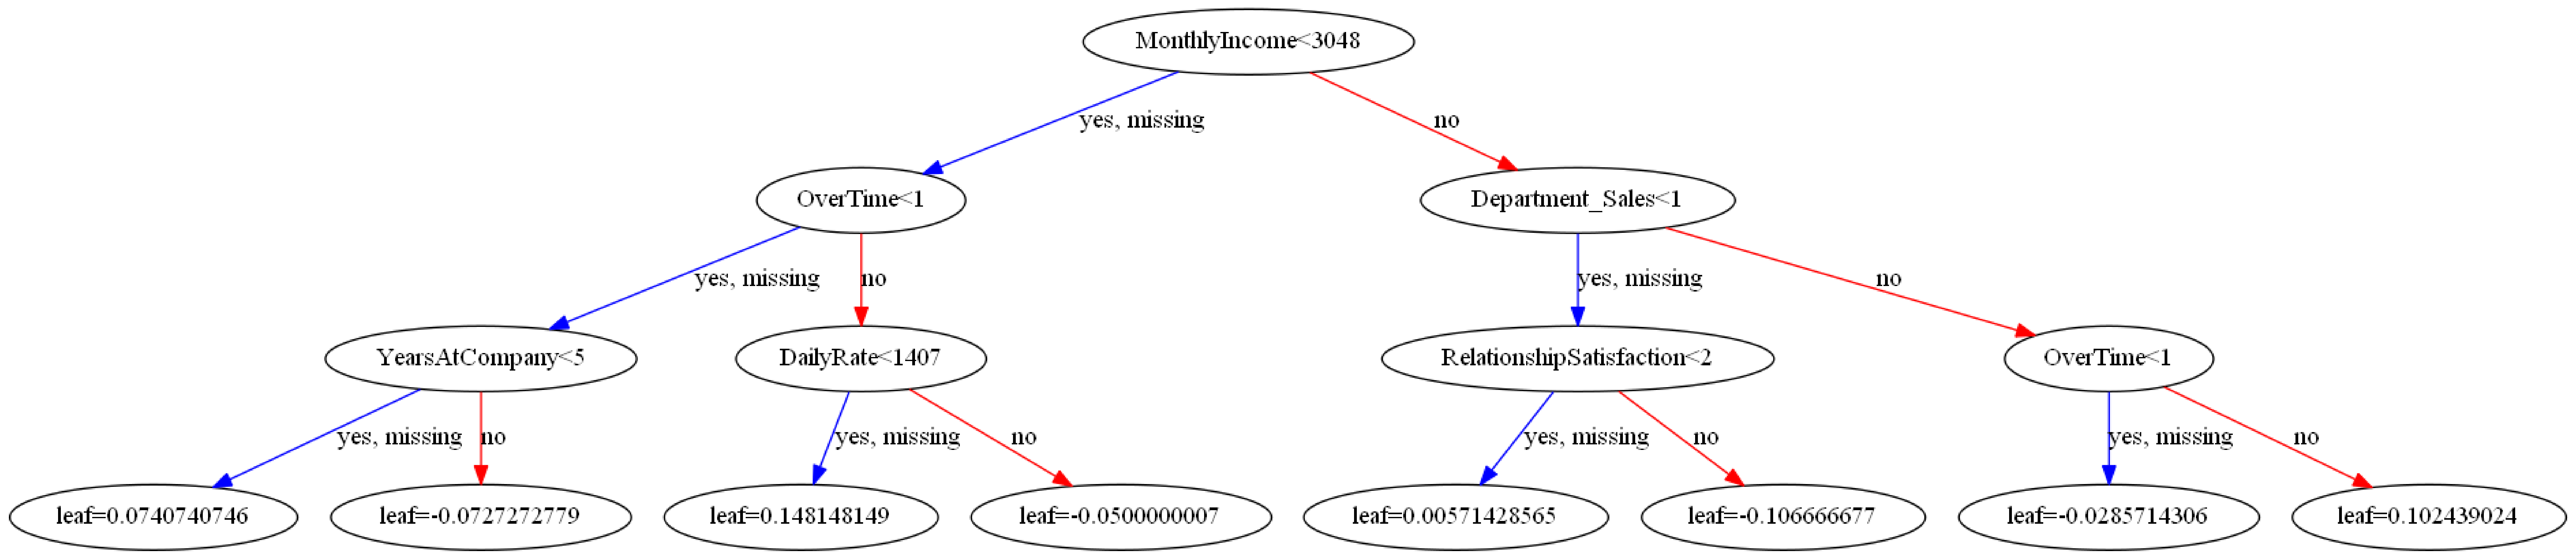

In [94]:
#XGB using gradientboosting selected features 
start_ts=time.time()
xgbclf = XGBClassifier()
xgbclf.fit(g_feature, under_target)   
scores_ACC1 = xgbclf.score(data_test[temp], target_test)                                                                                                                                                                                                                                         
print('XGBClassifier Acc:', scores_ACC1)
scores_AUC1 = metrics.roc_auc_score(target_test, xgbclf.predict_proba(data_test[temp])[:,1])         
print('XGBClassifier AUC:', scores_AUC1)   
print("Runtime:", time.time()-start_ts)
print(metrics.classification_report(target_test, xgbclf.predict(data_test[temp])))
Xgb2feat_importances = pd.Series(xgbclf.feature_importances_, index=g_feature.columns)
Xgb2feat_importances.nlargest(15).plot(kind='barh')
plt.title('XGB- gradientboosting: Top 15 important features')
plt.show()
#feature selection using gradientboosting classifier +UNDERSAMPLING
from xgboost import plot_tree
from matplotlib.pylab import rcParams
model3 = XGBClassifier()
model3.fit(g_feature, under_target)
# plot single tree
plot_tree(model3)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree1.png')

In [30]:
#feature selection using gradientboosting classifier on SMOTENEE data
from sklearn.ensemble import GradientBoostingClassifier
clf =GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, min_samples_split=3, max_depth=3, random_state=1) 
sels = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                                                         
print ('Wrapper Select: ')     
fit_mods=sels.fit(senn_train,senn_target )    
sel_idxs=fit_mods.get_support()
sel_indexs=sel_idxs.tolist()
#print(sel_index)
temps=[]
temp_idxs=[]
temp_dels=[]
for i in range(len(senn_train.columns.values)):
    if sel_indexs[i]==True:    
        temps.append(senn_train.columns.values[i])
        temp_idxs.append(i)
    else:                                                                       
        temp_dels.append(i)
print('Selected=', temps)
print('Features (total/selected):', len(senn_train.columns), len(temps))
#splite gradientboosting selected features 
g_feature2=senn_train[temps]
gbdata_train2, gbdata_test2, gbtarget_train2, gbtarget_test2 = train_test_split(g_feature2, senn_target, test_size=0.2, random_state=1)

Wrapper Select: 
Selected= ['DailyRate', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'StockOptionLevel', 'WorkLifeBalance', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Medical', 'Gender_Female', 'JobRole_Research Scientist', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']
Features (total/selected): 50 19


In [29]:
 #Using resample smote data to do gradientboosting selected features 
clf =GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, min_samples_split=3, max_depth=3, random_state=1) 
sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                                                         
print ('Wrapper Select: ')     
fit_mod=sel.fit(smote_train,smote_target )  
sel_idx2=fit_mod.get_support()
sel_index2=sel_idx2.tolist()
#print(sel_index)
temp2=[]
temp_idx2=[]
temp_del2=[]
for i in range(len(smote_train.columns.values)):
    if sel_index2[i]==True:    
        temp2.append(smote_train.columns.values[i])
        temp_idx2.append(i)
    else:                                                                       
        temp_del2.append(i)
print('Selected=', temp2)
print('Features (total/selected):', len(smote_train.columns), len(temp2))
#splite gradientboosting selected features 
g_feature3=smote_train[temp]
gbdata_train3, gbdata_test3, gbtarget_train3, gbtarget_test3 = train_test_split(g_feature3, smote_target, test_size=0.2, random_state=1)

Wrapper Select: 
Selected= ['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'WorkLifeBalance', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'EducationField_Life Sciences', 'EducationField_Medical', 'JobRole_Research Scientist', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']
Features (total/selected): 50 17


In [51]:
#feature selection using random forest classifier + smote data
r_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=3, random_state=1)              
r_sel = SelectFromModel(r_clf, prefit=False, threshold='mean', max_features=None)                   
print ('Wrapper Select: ')
fit_rmod=r_sel.fit(smote_train, smote_target)    
rsel_idx=fit_rmod.get_support()
rsel_index=rsel_idx.tolist()
#print(sel_index)
rtemp=[]
rtemp_idx=[]
rtemp_del=[]
for i in range(len(smote_train.columns.values)):
    if rsel_index[i]==True:    
        rtemp.append(smote_train.columns.values[i])
        rtemp_idx.append(i)
    else:                                                                      
        rtemp_del.append(i)
print('Selected=', rtemp)
print('Features (total/selected):', len(smote_train.columns), len(rtemp))
r_feature=smote_train[rtemp]
rdata_train, rdata_test, rtarget_train, rtarget_test = train_test_split(r_feature, smote_target, test_size=0.2, random_state=1)

Wrapper Select: 
Selected= ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Department_Research & Development', 'EducationField_Life Sciences', 'EducationField_Medical', 'MaritalStatus_Divorced', 'MaritalStatus_Married']
Features (total/selected): 50 23


In [48]:
#feature selection using random forest classifier on undersampling data
r_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=3, random_state=1)              
r_sel2 = SelectFromModel(r_clf, prefit=False, threshold='mean', max_features=None)                   
print ('Wrapper Select: ')
fit_rmod2=r_sel2.fit(under_train, under_target)    
rsel_idx2=fit_rmod2.get_support()
rsel_index2=rsel_idx2.tolist()
#print(sel_index)
rtemp2=[]
rtemp_idx2=[]
rtemp_del2=[]
for i in range(len(under_train.columns.values)):
    if rsel_index2[i]==True:    
        rtemp2.append(under_train.columns.values[i])
        rtemp_idx2.append(i)
    else:                                                                      
        rtemp_del2.append(i)
print('Selected=', rtemp2)
print('Features (total/selected):', len(under_train.columns), len(rtemp2))
r_feature2=under_train[rtemp2]
rdata_trainun, rdata_testun, rtarget_trainun, rtarget_testun = train_test_split(r_feature2, under_target, test_size=0.2, random_state=1)

Wrapper Select: 
Selected= ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Features (total/selected): 50 22


In [49]:
#feature selection using random forest classifier on smoteENN data
r_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=3, random_state=1)              
r_sel3 = SelectFromModel(r_clf, prefit=False, threshold='mean', max_features=None)                   
print ('Wrapper Select: ')
fit_rmod3=r_sel3.fit(senn_train,senn_target)    
rsel_idx3=fit_rmod3.get_support()
rsel_index3=rsel_idx3.tolist()
#print(sel_index)
rtemp3=[]
rtemp_idx3=[]
rtemp_del3=[]
for i in range(len(senn_train.columns.values)):
    if rsel_index3[i]==True:    
        rtemp3.append(senn_train.columns.values[i])
        rtemp_idx3.append(i)
    else:                                                                      
        rtemp_del3.append(i)
print('Selected=', rtemp3)
print('Features (total/selected):', len(under_train.columns), len(rtemp3))
r_feature3=senn_train[rtemp3]
rdata_trainSE, rdata_testSE, rtarget_trainSE, rtarget_testSE = train_test_split(r_feature3, senn_target, test_size=0.2, random_state=1)

Wrapper Select: 
Selected= ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'EducationField_Life Sciences', 'EducationField_Medical', 'MaritalStatus_Married']
Features (total/selected): 50 22


In [99]:
len(data_test)

294

In [100]:
len(target_test)

294